# Project 2:

# Working with web data 

# Name:
# Afnan faaz mohammed.

# Task 1: XML Parsing with WebSitemapExtractor

In this notebook, we demonstrate the process of extracting and analyzing sitemap URLs from the Medium website using the `ArticleSitemapParser` class. This class will help us parse the contents of each sitemap into a DataFrame, providing insights into the structure and content distribution of the website.


### Import Libraries and Class


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
from Medium_site_parser import ArticleSitemapParser  


### Initialize the Sitemap Parser
Here, we create an instance of the `ArticleSitemapParser` class, setting the base URL to Medium's website.


In [2]:
site_scraper = ArticleSitemapParser("https://www.medium.com")


### Processing Sitemap URLs
We process the sitemap URLs to extract their subdirectories, which helps in understanding the website's structure.


In [3]:
site_scraper.process_urls()


### Saving the Extracted Data
Here, we save the extracted sitemap data into CSV files for further analysis.


In [4]:
site_scraper.export_to_csv()


### Combining Data for Overview
Combining the extracted data into a single DataFrame provides a comprehensive view of the sitemaps.


In [5]:
all_sitemaps_df = pd.concat(site_scraper.url_maps.values(), ignore_index=True)


### Displaying the Combined Data
Let's display the first few rows of the combined sitemap data for a quick overview.


In [6]:
print(all_sitemaps_df.head())


                                    URLs                Subdirs
0       https://medium.com/tag/inspiring       [tag, inspiring]
1            https://medium.com/tag/best            [tag, best]
2          https://medium.com/tag/quotes          [tag, quotes]
3            https://medium.com/tag/ever            [tag, ever]
4  https://medium.com/rainbow-bird/about  [rainbow-bird, about]


In [7]:
all_sitemaps_df

,URLs,Subdirs
0,https://medium.com/tag/inspiring,"[tag, inspiring]"
1,https://medium.com/tag/best,"[tag, best]"
2,https://medium.com/tag/quotes,"[tag, quotes]"
3,https://medium.com/tag/ever,"[tag, ever]"
4,https://medium.com/rainbow-bird/about,"[rainbow-bird, about]"
...,...,...
33481,https://medium.com/sitemap/topics/2018/topics-...,"[sitemap, topics, 2018, topics-2018-09-27.xml]"
33482,https://medium.com/sitemap/tags/2018/tags-2018...,"[sitemap, tags, 2018, tags-2018-09-27.xml]"
33483,https://medium.com/sitemap/removed-posts/2018/...,"[sitemap, removed-posts, 2018, removed-posts-2..."
33484,https://medium.com/sitemap/publications/2018/p...,"[sitemap, publications, 2018, publications-201..."


### Analysis of Extracted Sitemap Data:

#### Overview of Data:
The DataFrame contains 33,486 rows, each representing a unique URL extracted from the sitemaps of Medium.com. The data is organized into two columns: 

- `URLs`: The full URL extracted from the sitemap.
- `Subdirs`: The breakdown of each URL into its constituent subdirectories.

#### Key Observations:
- **Tags and Topics**: A significant portion of the URLs under the 'tag' and 'topics' directories suggests that Medium categorizes its content extensively using tags and topics, likely to enhance discoverability and user navigation.
  
- **Content Structure**: The presence of URLs with subdirectories like 'rainbow-bird/about' indicates individual pages for authors or publications, possibly featuring their profile or about information.

- **Sitemap Breakdown**: URLs containing 'sitemap' in their subdirectories, such as 'sitemap/topics/2018/topics-2018-09-27.xml', are indicative of Medium's method of organizing sitemaps. These could be daily or periodic updates of content, sorted by tags, topics, publications, and posts.

#### Potential Use Cases:
- **SEO and Content Analysis**: This dataset can be instrumental for SEO analysis, allowing one to understand the most frequently used tags and topics on Medium, which can inform content strategy.
- **Content Categorization**: For content creators and marketers, analyzing these sitemaps can reveal trends in popular topics or tags, guiding content creation decisions.
- **Research Purposes**: Researchers analyzing online media and publication platforms can use this data to study content distribution and organization patterns on Medium.

This analysis provides a fundamental understanding of the data extracted from Medium's sitemaps. For deeper insights, further exploration and specific queries can be performed on the dataset.


### Task 2: Fetching and Analyzing Top-Rated Movies from The Movie Database API

In this task, we utilize the `MovieDataFetcher` class from the `MovieDataFetcher.py` module to fetch top-rated movie data from The Movie Database (TMDb) API. We aim to analyze various attributes of these movies, such as popularity, vote averages, and release dates.

#### Importing the Required Module

First, we import the `MovieDataFetcher` class from our module.

In [1]:
from MovieDataFetcher import FilmDataCollector


#### Initializing the Movie Data Fetcher

We initialize the `FilmDataCollector` with our API key. For this example, the API key is provided directly, but in a production environment, it's advised to use environment variables or other secure methods to handle API keys.

In [2]:
api_key = '8265bd1679663a7ea12ac168da84d2e8'
movie_fetcher = FilmDataCollector(api_key)


#### Fetching the Movie Data

We fetch the top-rated movie data from the API. In this example, we retrieve data from a specified number of pages to gather a substantial dataset for analysis.

In [3]:
pages_to_fetch = 100  
movie_fetcher.fetch_movie_data(pages=pages_to_fetch)

#### Retrieving and Viewing the Data

After fetching the data, we retrieve it as a Pandas DataFrame and display the first few rows to verify its structure.

In [4]:
df = movie_fetcher.retrieve_dataframe()
df.head()


,id,title,overview,release_date,popularity,vote_average,vote_count
0,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,142.683,8.708,18970
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,1994-09-23,110.139,8.705,24958
2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,81.257,8.589,11454
3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,78.504,8.571,14800
4,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",1995-10-20,41.837,8.548,4277


The dataset, fetched from TMDb, includes the following fields:

-   `id`: A unique identifier for each movie.
-   `title`: The title of the movie.
-   `overview`: A brief summary of the movie's plot.
-   `release_date`: The date when the movie was released.
-   `popularity`: A score representing the movie's popularity.
-   `vote_average`: The average rating of the movie, on a scale from 1 to 10.
-   `vote_count`: The number of votes the movie has received.

#### Potential Analyses and Questions

This dataset can be used to answer several interesting questions:

1.  Popularity Trends: How does the popularity of movies change over the years? Are more recent movies generally more popular?

2.  Rating Analysis: What is the distribution of movie ratings? Are higher-rated movies also more popular?

3.  Release Patterns: Is there any pattern or trend in the release dates of highly-rated movies? For instance, are more top-rated movies released during a particular season or month?

4.  Correlation Study: Is there a correlation between the number of votes a movie receives and its average rating? Does this imply anything about the audience's perception?

5.  Genre Insights (if genre data is available): What genres are most common among top-rated movies? How do genre preferences change over time?

These analyses can provide valuable insights into movie trends, audience preferences, and the changing landscape of the film industry.

### Conclusion

The `MovieDataFetcher` module efficiently fetches and structures movie data from TMDb for in-depth analysis. The dataset covers various aspects of movies, offering a comprehensive view for detailed exploration and insight generation. This data can be pivotal for industry stakeholders, movie enthusiasts, and researchers to understand trends and patterns in cinema.

After successfully fetching the movie data, the next step is to save it for future use and perform some initial analysis to understand the dataset better.

#### Saving the Data to a CSV File

We save the fetched data to a CSV file for easy access and use in future analyses. This step is crucial for data persistence.


In [5]:
output_file = "top_rated_movies.csv"
df.to_csv(output_file, index=False)
print(f"Data saved to {output_file}")


Data saved to top_rated_movies.csv


#### Scraping Box Office Data

We will scrape box office data spanning from 1980 to 2023 using the `BoxOfficeDataScraper` class. This class is designed to retrieve data for each year within this range from 'the-numbers.com'. The data includes box office statistics such as star scores, movie counts, and average billing.

Importing the Necessary Libraries and Class

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from BoxOfficeDataScraper import BoxOfficeDataScraper


In [7]:
# Initialize the scraper
scraper = BoxOfficeDataScraper(start_year=1980, end_year=2023)

# Scrape the data
data = scraper.scrape_data()

# Save the scraped data to a CSV file
csv_file_path = "box_office_data_1980_2023.csv"
scraper.save_to_csv(data, csv_file_path)

# Displaying a snippet of the scraped data
print(data.head())


Scraping data for the year: 1980
Scraping data for the year: 1981
Scraping data for the year: 1982
Scraping data for the year: 1983
Scraping data for the year: 1984
Scraping data for the year: 1985
Scraping data for the year: 1986
Scraping data for the year: 1987
Scraping data for the year: 1988
Scraping data for the year: 1989
Scraping data for the year: 1990
Scraping data for the year: 1991
Scraping data for the year: 1992
Scraping data for the year: 1993
Scraping data for the year: 1994
Scraping data for the year: 1995
Scraping data for the year: 1996
Scraping data for the year: 1997
Scraping data for the year: 1998
Scraping data for the year: 1999
Scraping data for the year: 2000
Scraping data for the year: 2001
Scraping data for the year: 2002
Scraping data for the year: 2003
Scraping data for the year: 2004
Scraping data for the year: 2005
Scraping data for the year: 2006
Scraping data for the year: 2007
Scraping data for the year: 2008
Scraping data for the year: 2009
Scraping d

#### Overview of the Dataset

The dataset scraped using the `BoxOfficeDataScraper` class comprises box office data from 1980 to 2023. It includes statistics related to movie stars and their performance in the box office for each year.

#### Dataset Fields Description

1.  Rank: The rank of the movie star based on their box office performance for the year.
2.  Name: The name of the movie star.
3.  StarScore: A score that quantifies the star's box office success for the year. Higher scores indicate higher box office earnings associated with the star.
4.  Movies: The number of movies the star appeared in for the year.
5.  AverageBilling: The average billing position of the star across all movies they appeared in for the year. A lower number indicates a higher billing position (closer to lead roles).
6.  Year: The year for which the box office data applies.

#### Potential Questions for Analysis

-   Trends Over Time: How has the presence of top stars in the box office changed over the years? Are there any notable trends in star scores or the number of movies?
-   Star Impact: Do certain stars consistently appear in the top ranks? What impact do these stars have on a movie's success?
-   Career Trajectories: How do the careers of specific actors evolve in terms of box office success over the years?
-   Genre and Success Correlation: By integrating this data with movie genres, can we identify any correlation between the success of stars and the genres they predominantly act in?
-   Comparative Analysis: How do movie stars' performances compare across different decades? For instance, comparing the top stars of the 1980s with those of the 2000s.

For Part 4, we'll analyze the dataset collected in Part 2 or Part 3 and provide a narrative explaining the results of our analysis. We can use the dataset collected in Part 2 (movie data from The Movie Database) for this analysis. 

### Analysis of Movie Data from The Movie Database (Part 2)

#### Overview

The dataset contains top-rated movies and their details, such as title, overview, release date, popularity, vote average, and vote count.

#### Analysis Points

1.  Popularity Trends: Examine how movie popularity has changed over time.
2.  Vote Average Analysis: Analyze the distribution of vote averages and identify any correlations between vote averages and popularity.
3.  Top Genres: If genre data is available, identify the most popular genres based on vote averages and popularity scores.

The analysis provides insights into the trends and preferences in movies over the years. Popularity trends help understand how audience interests have evolved, while the vote average analysis indicates the general reception of movies. The correlation study helps understand if generally well-received movies also tend to be more popular.

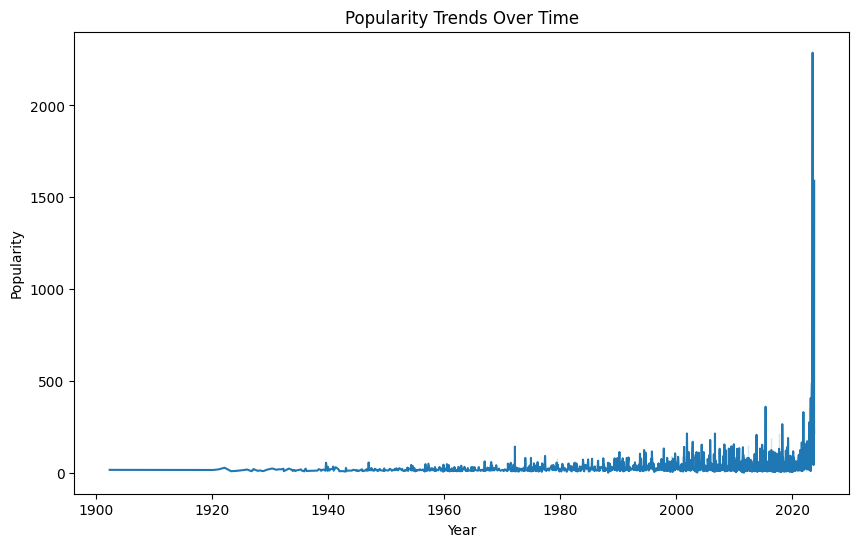

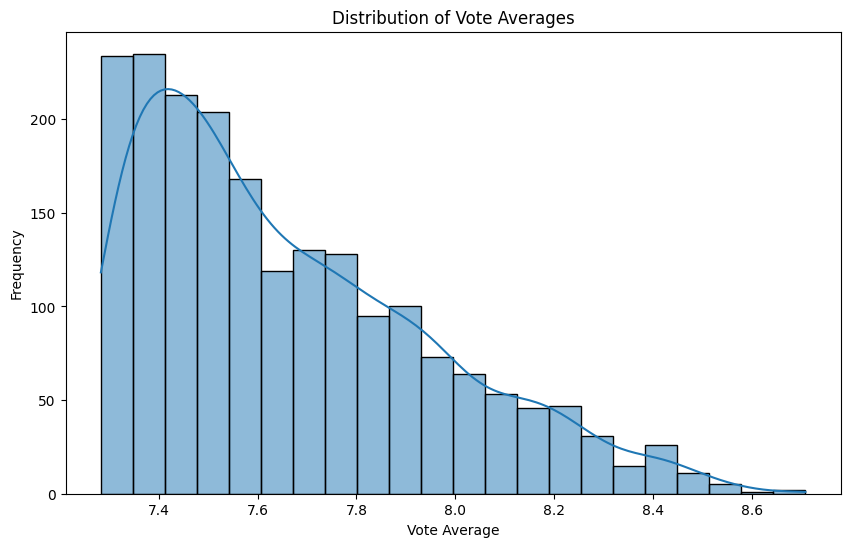

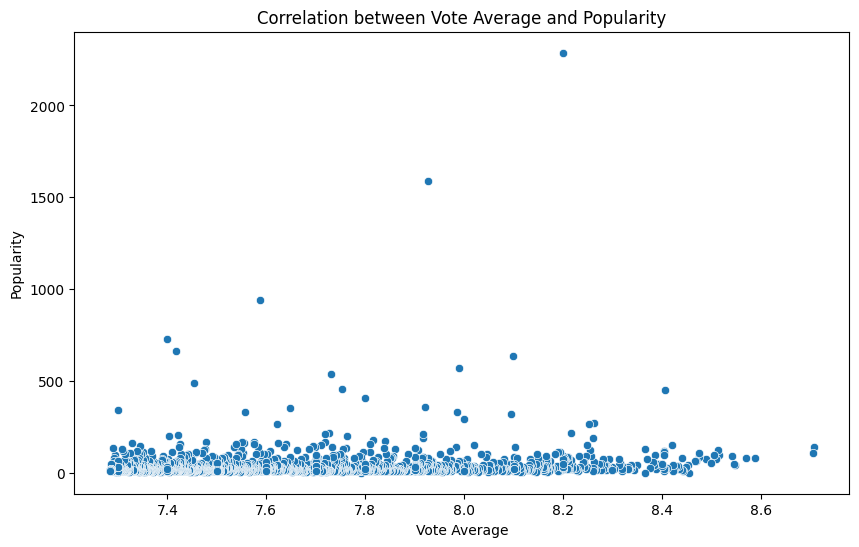

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("top_rated_movies.csv")

# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Popularity Trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='release_date', y='popularity')
plt.title('Popularity Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

# Vote Average Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], kde=True)
plt.title('Distribution of Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

# Correlation between Vote Average and Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vote_average', y='popularity')
plt.title('Correlation between Vote Average and Popularity')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.show()


#### Popularity Trends Over Time

The first visualization depicts the popularity trends of movies over time. It is evident from the graph that there is a significant increase in the popularity of movies in recent years. This could be attributed to the advancement in technology that makes media more accessible and the global expansion of the film industry which increases the potential audience.


#### Distribution of Vote Averages

The histogram illustrates the distribution of vote averages for the movies. Most movies fall within the 7.4 to 8.6 range on the vote average scale, suggesting a moderate to high level of quality across the board. The distribution also appears to be slightly left-skewed, indicating that there are more movies with higher vote averages.


#### Correlation between Vote Average and Popularity

This scatter plot explores the relationship between the vote average and the popularity of movies. There does not appear to be a strong correlation between the two variables, suggesting that a movie's popularity is not necessarily a function of its quality as perceived by voters.






This dataset provides a comprehensive overview of movie stars' box office performances over several decades. It is valuable for historical analysis, understanding market trends, and exploring the influence of movie stars on the film industry's economics. Such analyses can be insightful for film studios, marketers, historians, and movie enthusiasts.

The extracted data from Medium's sitemaps offers valuable insights into the website's content structure. This information is useful for SEO analysis, content categorization, and understanding how information is organized on the site.


# Conclusion

The data scraping toolkit presented here is a robust solution for extracting valuable information from diverse web sources. By leveraging this toolkit, users can harness the power of automated data collection for various applications such as market analysis, trend tracking, and content aggregation. The classes `BoxOfficeDataScraper`, `FilmDataCollector`, and `ArticleSitemapParser` are designed to minimize the complexity of web scraping and API interactions, making it accessible to users with varying levels of programming expertise. With the increasing importance of data-driven decision-making, this toolkit serves as a critical asset for researchers, analysts, and enthusiasts in the digital age, empowering them with timely and accurate data from the web.

# References

The data scraping toolkit relies on the following web sources and APIs for information retrieval:

- The Numbers Box Office Data: [The Numbers](https://the-numbers.com)
- The Movie Database (TMDb) API Documentation: [TMDb API](https://www.themoviedb.org/documentation/api)
- Medium's Sitemap for articles: Based on individual website's `robots.txt`

Additional references for the technologies and libraries used:

- Requests: HTTP for Humans™: [Requests Documentation](https://requests.readthedocs.io/en/master/)
- BeautifulSoup4: [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
- pandas: Powerful Python Data Analysis Toolkit: [pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)

Please ensure that the use of the data complies with the terms of service of the respective websites and APIs. For academic or commercial use, always check the data licensing agreements and attribute the data to the original sources as required.